In [1]:
import h5py, os
import numpy as np
from scipy.stats import norm

from tests import *
from plot_utils import plot_power

# 1D

In [2]:
flk_sigmas_all = [
    0.01,
    0.1, 
    0.3,
    0.7, 
    1.4,
    2.3,
    3.0,
    4.5,
    9.0,
]
files = [
    './test_statistics/univariate/NR200000_NB2000_NS0_M1000_lam1e-06/t_array.npy',
    './test_statistics/univariate/NR200000_NB2000_NS7_loc4_std0.01_M1000_lam1e-06/t_array.npy',
    './test_statistics/univariate/NR200000_NB2000_NS18_loc4_std0.16_M1000_lam1e-06/t_array.npy',
    './test_statistics/univariate/NR200000_NB2000_NS13_loc4_std0.64_M1000_lam1e-06/t_array.npy',
    './test_statistics/univariate/NR200000_NB2000_NS90_loc1.6_std0.16_M1000_lam1e-06/t_array.npy',
    './test_statistics/univariate/NR200000_NB2000_NS10_loc6.4_std0.16_M1000_lam1e-06/t_array.npy',
]

np_list = ['ref',
           'narrow_NB2000_NS7_loc4_std0.01',
           'narrow_NB2000_NS18_loc4_std0.16', 'broad_NB2000_NS13_loc4_std0.64', 
           'narrow_NB2000_NS90_loc1.6_std0.16', 'narrow_NB2000_NS10_loc6.4_std0.16']

In [3]:
tests=[0,2,3,4,7,8] 
ref = np.load(files[0])[:,tests]
ref_90 = np.load(files[0])[:,5]
for idx,NP in enumerate(np_list):
    print(NP)
    data = np.load(files[idx])[:,tests]
    data_90 = np.load(files[idx])[:,5]
    for i in range(ref.shape[1]):
        print(i, power(ref[:, [i]],data[:, [i]],zalpha=[2,3])[2])
    
    pmin_ref, pmin_data =  min_p(ref,data)
    prod_p_ref, prod_p_data = prod_p(ref,data)
    avg_p_ref, avg_p_data = avg_p(ref,data)
    print('p-min\t',  power(pmin_ref,pmin_data,zalpha=[2,3])[2])
    print('p-prod\t', power(prod_p_ref,prod_p_data,zalpha=[2,3])[2])
    print('p-avg\t',  power(avg_p_ref,avg_p_data,zalpha=[2,3])[2])
    print('t-smax\t', power(fusion(ref,1),fusion(data,1),zalpha=[2,3])[2])
    print('p-90\t', power(ref_90,data_90,zalpha=[2,3])[2])
    print('+++++++++++++++++++')

ref
0 [(0.02275, 0.00235, 0.00233), (0.0015, 0.00059, 0.00059)]
1 [(0.02275, 0.00235, 0.00233), (0.0015, 0.00059, 0.00059)]
2 [(0.02275, 0.00235, 0.00233), (0.0015, 0.00059, 0.00059)]
3 [(0.02275, 0.00235, 0.00233), (0.0015, 0.00059, 0.00059)]
4 [(0.02275, 0.00235, 0.00233), (0.0015, 0.00059, 0.00059)]
5 [(0.02275, 0.00235, 0.00233), (0.0015, 0.00059, 0.00059)]
p-min	 [(0.02325, 0.00237, 0.00236), (0.0015, 0.00059, 0.00059)]
p-prod	 [(0.02275, 0.00235, 0.00233), (0.0015, 0.00059, 0.00059)]
p-avg	 [(0.02275, 0.00235, 0.00233), (0.0015, 0.00059, 0.00059)]
t-smax	 [(0.02275, 0.00235, 0.00233), (0.0015, 0.00059, 0.00059)]
p-90	 [(0.02275, 0.00235, 0.00233), (0.0015, 0.00059, 0.00059)]
+++++++++++++++++++
narrow_NB2000_NS7_loc4_std0.01
0 [(0.039, 0.00305, 0.00303), (0.00275, 0.00081, 0.00081)]
1 [(0.083, 0.00436, 0.00431), (0.012, 0.00171, 0.0017)]
2 [(0.0715, 0.00407, 0.00403), (0.006, 0.00121, 0.0012)]
3 [(0.0515, 0.00349, 0.00346), (0.004, 0.00098, 0.00098)]
4 [(0.03725, 0.00298, 0.00296

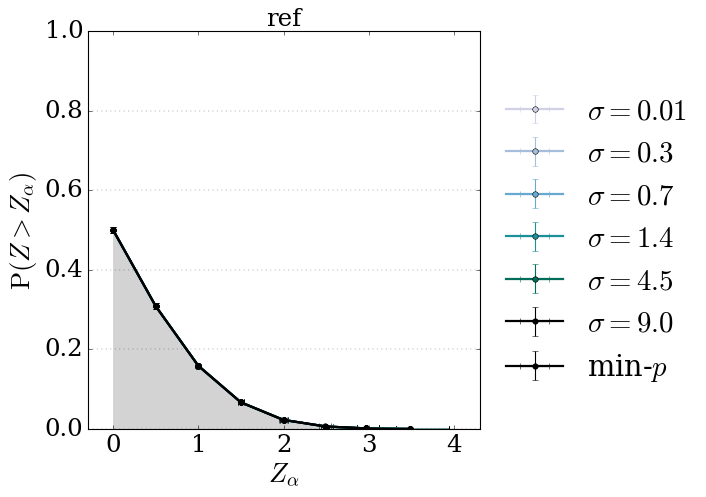

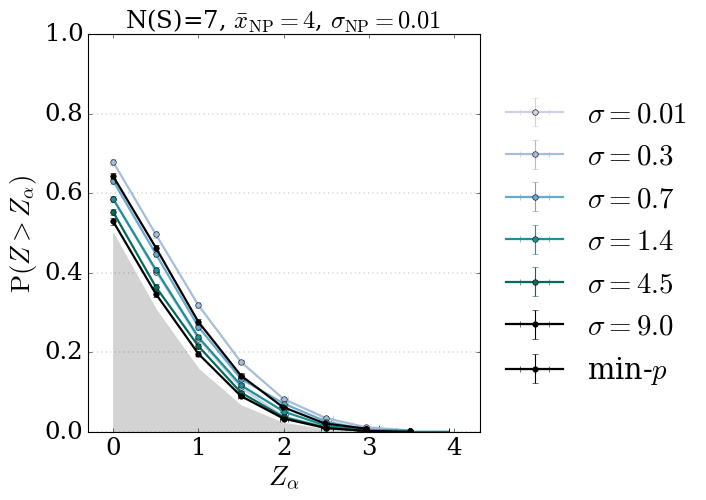

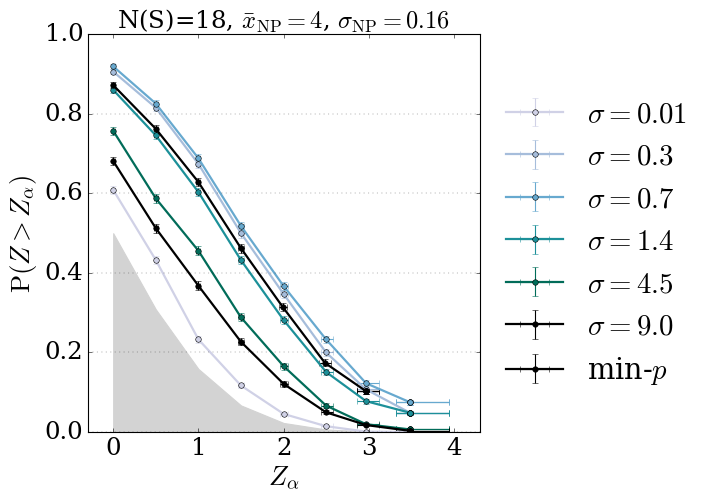

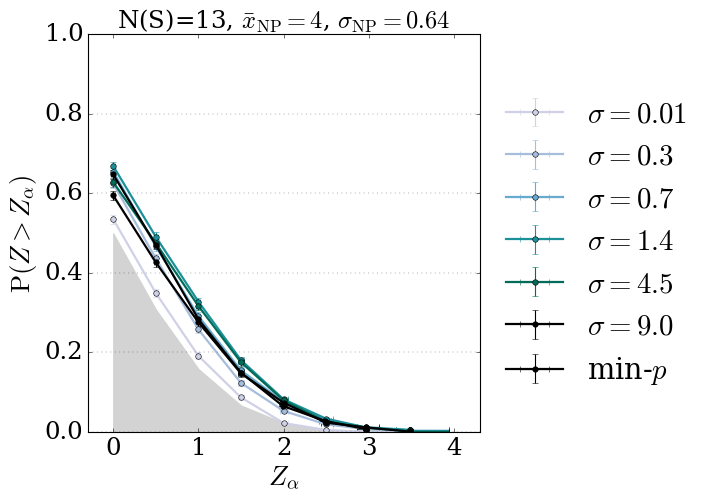

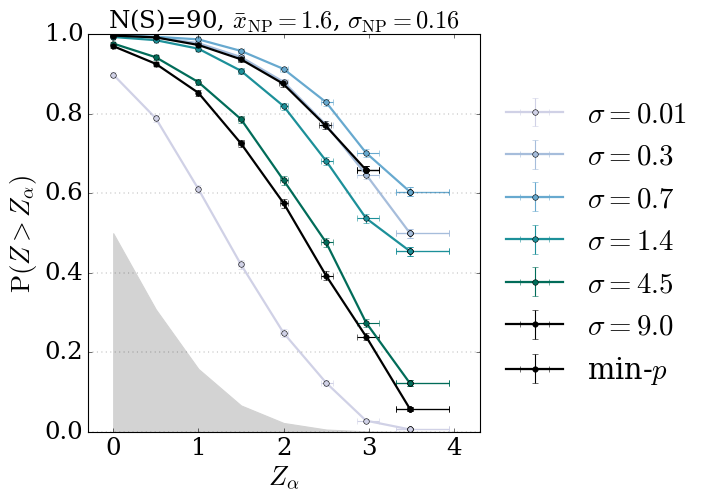

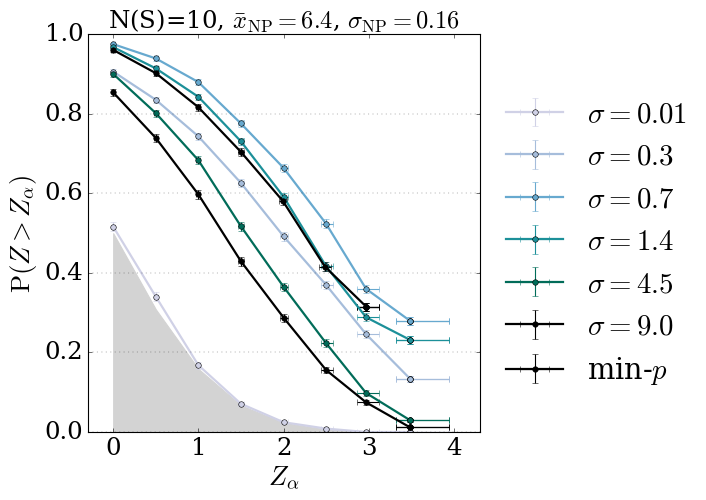

In [4]:
tests=[0,2,3,4,7,8] 
flk_sigmas = [flk_sigmas_all[i] for i in tests]

labels_plot = {
'ref':'ref',
'narrow_NB2000_NS7_loc4_std0.01': r'N(S)=7, $\bar x_{\rm NP}=4$, $\sigma_{\rm NP}=0.01$',
'narrow_NB2000_NS18_loc4_std0.16': r'N(S)=18, $\bar x_{\rm NP}=4$, $\sigma_{\rm NP}=0.16$',
'broad_NB2000_NS13_loc4_std0.64': r'N(S)=13, $\bar x_{\rm NP}=4$, $\sigma_{\rm NP}=0.64$',
'narrow_NB2000_NS90_loc1.6_std0.16': r'N(S)=90, $\bar x_{\rm NP}=1.6$, $\sigma_{\rm NP}=0.16$', 
'narrow_NB2000_NS10_loc6.4_std0.16': r'N(S)=10, $\bar x_{\rm NP}=6.4$, $\sigma_{\rm NP}=0.16$'
}

output = "./output_1D/"

plot_power(files, tests, flk_sigmas, np_list, labels_plot, output)

# 5D

In [5]:
files = [
    "./test_statistics/dimuon/Ntoys2000_NR100000_NB20000_cut60_null/t_array.npy",
    "./test_statistics/dimuon/Ntoys1000_NR100000_NB20000_NS60_Z180_cut60/t_array.npy",
    "./test_statistics/dimuon/Ntoys1000_NR100000_NB20000_NS30_Z300_cut60/t_array.npy",
    "./test_statistics/dimuon/Ntoys1000_NR100000_NB20000_NS8_Z600_cut60/t_array.npy",
    "./test_statistics/dimuon/Ntoys1000_NR100000_NB20000_NS53_EFT5_cut60/t_array.npy"
]

np_list = ['ref',
           'Z180',
           'Z300', 
           'Z600', 
           'EFT5']

os.makedirs("./output_5D", exist_ok=True)


In [6]:
tests = [0,3,4,5,8,9]
ref = np.load(files[0])[:,tests]
ref_90 = np.load(files[0])[:,6]
for idx,file in enumerate(files):
    print(file[:-12])
    data = np.load(files[idx])[:,tests]
    data_90 = np.load(files[idx])[:,6]
    for i in range(ref.shape[1]):
        print(i, power(ref[:, [i]],data[:, [i]],zalpha=[2,3])[2])
    
    pmin_ref, pmin_data =  min_p(ref,data)
    prod_p_ref, prod_p_data = prod_p(ref,data)
    avg_p_ref, avg_p_data = avg_p(ref,data)
    print('p-min\t',  power(pmin_ref,pmin_data,zalpha=[2,3])[2])
    print('p-prod\t', power(prod_p_ref,prod_p_data,zalpha=[2,3])[2])
    print('p-avg\t',  power(avg_p_ref,avg_p_data,zalpha=[2,3])[2])
    print('t-smax\t', power(fusion(ref,1),fusion(data,1),zalpha=[2,3])[2])
    print('p-90\t', power(ref_90,data_90,zalpha=[2,3])[2])
    print('+++++++++++++++++++')

./test_statistics/dimuon/Ntoys2000_NR100000_NB20000_cut60_null
0 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
1 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
2 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
3 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
4 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
5 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
p-min	 [(0.0245, 0.00344, 0.00341), (0.002, 0.00095, 0.00095)]
p-prod	 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
p-avg	 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
t-smax	 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
p-90	 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
+++++++++++++++++++
./test_statistics/dimuon/Ntoys1000_NR100000_NB20000_NS60_Z180_cut60
0 [(0.107, 0.00981, 0.00959), (0.007, 0.00257, 0.00255)]
1 [(0.302, 0.01473, 0.01412), (0.096, 0.00934, 0.00915)]
2 [(0.301, 0.01471, 0.01411), (0.065, 0.0078, 0.00766)]
3 [(0.292, 0.01

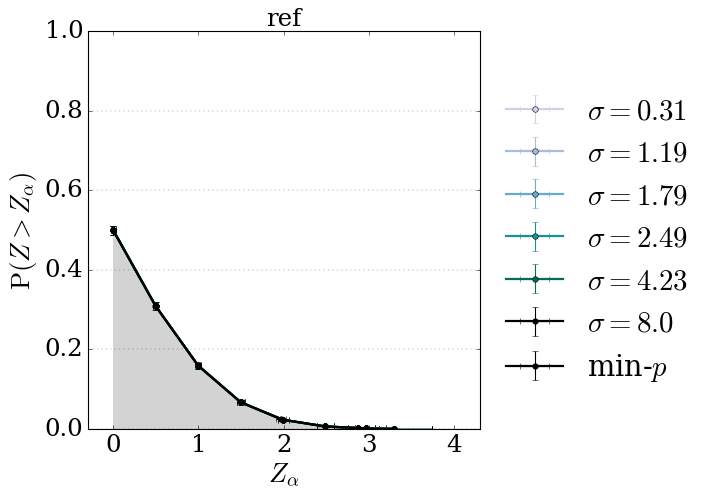

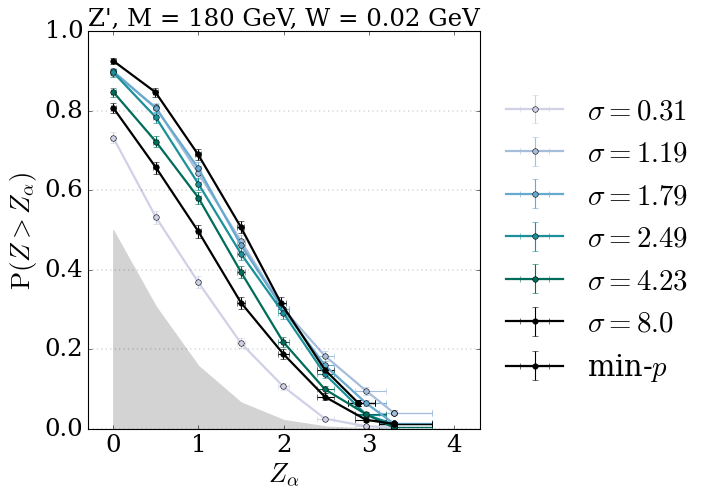

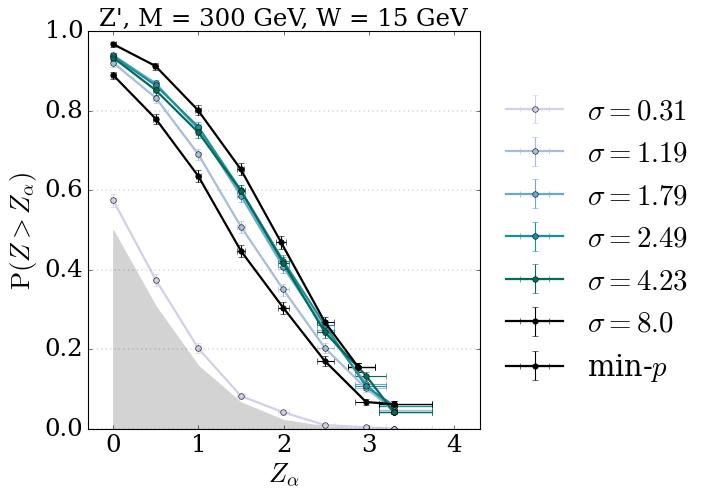

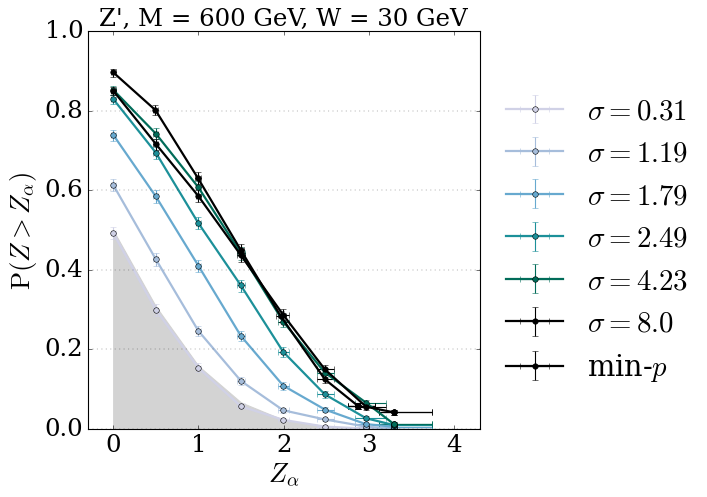

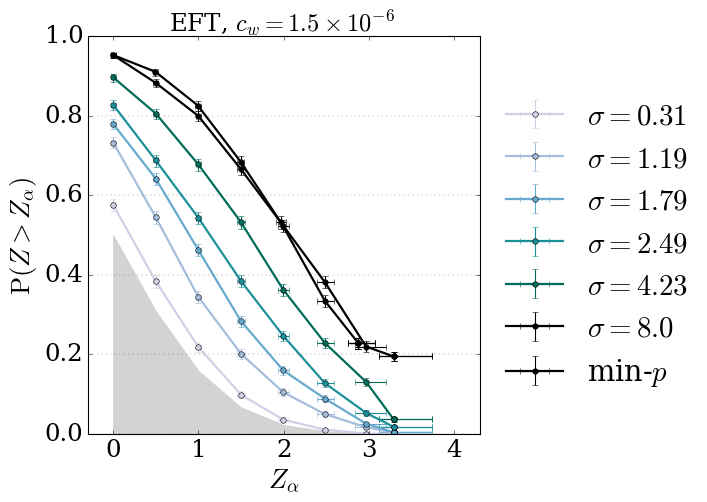

In [7]:
tests = [0,3,4,5,8,9]
flk_sigmas = [0.31, 1.19, 1.79, 2.49, 4.23, 8.0 ]

labels_plot = {
    'ref':'ref',
    'Z180': "Z', M = 180 GeV, W = 0.02 GeV",
    'Z300': "Z', M = 300 GeV, W = 15 GeV",
    'Z600': "Z', M = 600 GeV, W = 30 GeV",
    'EFT5': r"EFT, $c_w=1.5\times 10^{-6}$ ",
}

output = "./output_5D/"

plot_power(files, tests, flk_sigmas, np_list, labels_plot, output)

# 6D

In [8]:
flk_sigmas_all = [1.2, 1.7, 2.5, 3.2, 3.9, 4.6, 5.1, 6.1, 12.2]
files = [
    './test_statistics/lhco/M853_lam1e-06_NB121339_NS0/t_array.npy',
    './test_statistics/lhco/M853_lam1e-06_NB121339_NS333/t_array.npy',
    ]

np_list = ['ref', 'S=333']

os.makedirs("./output_6D", exist_ok=True)

In [9]:
tests = [0, 2, 3, 4, 7, 8]
ref = np.load(files[0])[:,tests]
ref_90 = np.load(files[0])[:,5]
for idx,NP in enumerate(np_list):
    print(NP)
    data = np.load(files[idx])[:,tests]
    data_90 = np.load(files[idx])[:,5]
    for i in range(ref.shape[1]):
        print(i, power(ref[:, [i]],data[:, [i]],zalpha=[2,3])[2])
    
    pmin_ref, pmin_data =  min_p(ref,data)
    prod_p_ref, prod_p_data = prod_p(ref,data)
    avg_p_ref, avg_p_data = avg_p(ref,data)
    print('p-min\t',  power(pmin_ref,pmin_data,zalpha=[2,3])[2])
    print('p-prod\t', power(prod_p_ref,prod_p_data,zalpha=[2,3])[2])
    print('p-avg\t',  power(avg_p_ref,avg_p_data,zalpha=[2,3])[2])
    print('t-smax\t', power(fusion(ref,1),fusion(data,1),zalpha=[2,3])[2])
    print('p-90\t', power(ref_90,data_90,zalpha=[2,3])[2])
    print('+++++++++++++++++++')

ref
0 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
1 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
2 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
3 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
4 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
5 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
p-min	 [(0.0245, 0.00344, 0.00341), (0.0025, 0.00108, 0.00107)]
p-prod	 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
p-avg	 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
t-smax	 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
p-90	 [(0.023, 0.00333, 0.00331), (0.0015, 0.00081, 0.00081)]
+++++++++++++++++++
S=333
0 [(0.2785, 0.0101, 0.00982), (0.076, 0.00592, 0.00585)]
1 [(0.28, 0.01012, 0.00984), (0.103, 0.0068, 0.0067)]
2 [(0.286, 0.01019, 0.0099), (0.0875, 0.00632, 0.00623)]
3 [(0.2755, 0.01007, 0.00979), (0.0475, 0.00475, 0.0047)]
4 [(0.219, 0.0093, 0.00908), (0.0455, 0.00465, 0.0046)]
5 [(0.1745, 0.00852, 0.

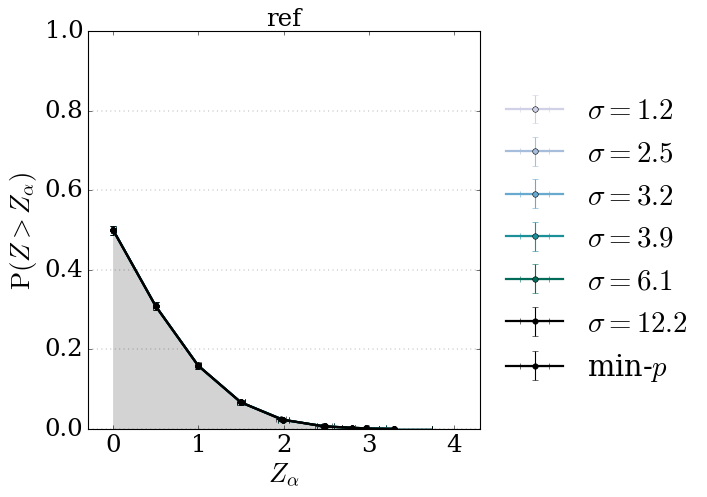

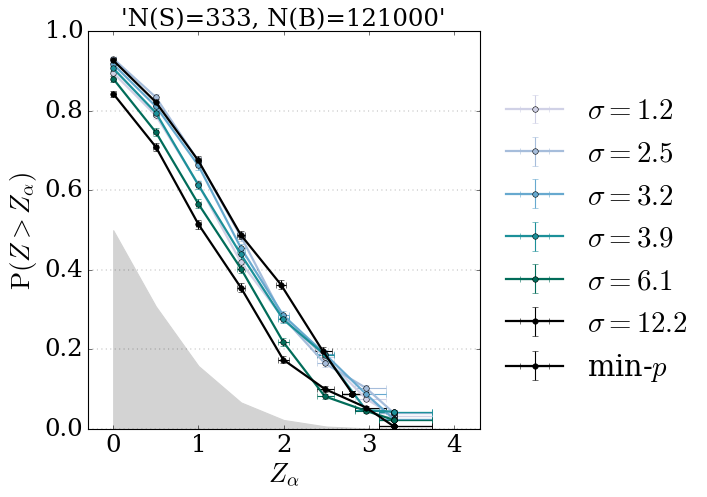

In [10]:
tests = [0, 2, 3, 4, 7, 8]
flk_sigmas_all = [1.2, 1.7, 2.5, 3.2, 3.9, 4.6, 5.1, 6.1, 12.2]

flk_sigmas = [flk_sigmas_all[i] for i in tests]

labels_plot = {
    'ref':'ref',
    'S=333': "'N(S)=333, N(B)=121000'",
}

output = "./output_6D/"

plot_power(files, tests, flk_sigmas, np_list, labels_plot, output)